In [1]:
%matplotlib inline
import numpy as np
import os
import threading
import operator
import pickle
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats


start_time = 1190146243
end_time = 1192994591

In [2]:
def dump_data(data, output_name):
    with open(output_name, 'wb') as f:
        pickle.dump(data, f)

def load_data(input_name):
    with open(input_name, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
times = load_data('data/dump/word_access_timestamps_0-5000.pkl')

In [4]:
keys=times.keys()

In [5]:
key_list=list(times.keys())

In [6]:
len(key_list)

5000

In [7]:
times[key_list[0]][0]

'1192332798.355'

In [8]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

for x in my_range(10, 19, 1):
    print (x)

10
11
12
13
14
15
16
17
18
19


In [9]:
ks=[]
for i in my_range(0, 499, 1):
        listdate=[]
        for j in range(0,len(times[key_list[i]])):
            a=float(times[key_list[i]][j])
            listdate.append(datetime.fromtimestamp(a))
        X=[]
        for k in range(0,len(times[key_list[i]])):
            if(listdate[k].month==9):
                value=listdate[k].day-17
            else:
                value=listdate[k].day+13
            X.append(value) 
        unique, counts = np.unique(X, return_counts=True)
        ww2=dict(zip(unique, counts))
        list_ww=list(ww2.values())
        ks_a, ks_p = stats.kstest(list_ww, lambda x: (x-min(list_ww)) / (max(list_ww)-min(list_ww)))
        ks.append(ks_a)

In [10]:
ks[200]

0.2963235294117647

In [11]:
for i in my_range(500, 999, 1):
        listdate=[]
        for j in range(0,len(times[key_list[i]])):
            a=float(times[key_list[i]][j])
            listdate.append(datetime.fromtimestamp(a))
        X=[]
        for k in range(0,len(times[key_list[i]])):
            if(listdate[k].month==9):
                value=listdate[k].day-17
            else:
                value=listdate[k].day+13
            X.append(value) 
        unique, counts = np.unique(X, return_counts=True)
        ww2=dict(zip(unique, counts))
        list_ww=list(ww2.values())
        ks_a, ks_p = stats.kstest(list_ww, lambda x: (x-min(list_ww)) / (max(list_ww)-min(list_ww)))
        ks.append(ks_a)

In [12]:
len(ks)

1000

(array([ 30., 114., 245., 239., 155.,  92.,  67.,  38.,  13.,   7.]),
 array([0.10811642, 0.18848963, 0.26886285, 0.34923606, 0.42960928,
        0.50998249, 0.59035571, 0.67072892, 0.75110214, 0.83147535,
        0.91184857]),
 <a list of 10 Patch objects>)

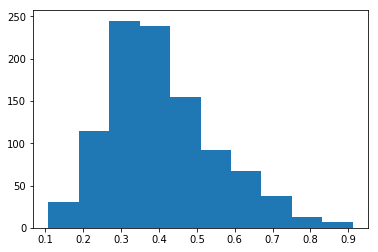

In [13]:
plt.hist(ks)

In [16]:
word=[]
for i in range(0,1000):
     if(ks[i]<0.2):
        word.append(key_list[i])  

In [42]:
hotwords=pd.read_csv('./data/revisions/hot_10000.csv',sep='	')
hotwords.sort_values(by=['frequency'],ascending=False,inplace=True)

In [43]:
hotwords

,entry,frequency
8957,Wiki,444697
4032,World_War_II,63815
2164,Hard_disk,61565
3360,Heroes,55509
4660,Heroes,55509
8033,Data_(Star_Trek),54397
7598,Super_Smash_Bros._Brawl,44364
9004,Che_Guevara,40104
5406,Blackwater_USA,38982
3139,Blackwater_USA,38982


In [17]:
word

['Diabetes',
 'The_Death_of_Superman',
 'United_States_presidential_election,_2008',
 'Saw_III',
 'Longitude',
 'Hurricane',
 'Adjective',
 'Mexican-American_War',
 'Fifa_08',
 'Hillary_Clinton',
 'United_States_Senate',
 'Jodie_Foster',
 'Vector_graphics',
 'Taylor_series',
 'Cannabis_(drug)',
 'War_in_Iraq',
 'Karrine_Steffans',
 'Paul_Revere',
 'Wes_Anderson',
 'Goosebumps',
 'Phentermine',
 'South_America',
 'Samhain',
 'Adam_Smith',
 'Failure',
 'Continent',
 'Niels_Bohr',
 'Conference_calls',
 'Circulatory_system',
 'Chinese_New_Year',
 'History_of_the_Internet',
 'MSN_Hotmail',
 'Isotope',
 'First_Amendment',
 'List_of_Goosebumps_books',
 'Flight_of_the_Conchords',
 'America%27s_next_top_model']

In [ ]:
len(times["New_York"])

In [ ]:
len(times)

In [ ]:
float(times["New_York"][0])

In [ ]:
listdate=[]
a=float(times["New_York"][0])
datetime.fromtimestamp(a)
listdate.append(datetime.fromtimestamp(a))

In [ ]:
listdate[0].month

In [ ]:
len(times.keys())

In [ ]:
listdate=[]
for i in range(0,len(times["New_York"])):
    a=float(times["New_York"][i])
    listdate.append(datetime.fromtimestamp(a))

In [ ]:
start=datetime.fromtimestamp(1190146243)
end=datetime.fromtimestamp(1192994591)

In [ ]:
start

In [ ]:
end

In [ ]:
listdate

In [ ]:
X=[]
for i in range(0,len(times["New_York"])):
    if(listdate[i].month==9):
        value=listdate[i].day-17
    else:
        value=listdate[i].day+13
    X.append(value)      

In [ ]:
X.sort()

In [ ]:
np.var(X)

In [ ]:
plt.hist(X,34)

In [ ]:
hotwords=pd.read_csv('./data/revisions/hot_10000.csv',sep='	')
hotwords.sort_values(by=['frequency'],ascending=False,inplace=True)

In [ ]:
times["World_War_II"]

In [ ]:
hotwords

In [22]:
listdate=[]
for i in range(0,len(times["World_War_II"])):
    a=float(times["World_War_II"][i])
    listdate.append(datetime.fromtimestamp(a))

In [23]:
X=[]
for i in range(0,len(times["World_War_II"])):
    if(listdate[i].month==9):
        value=listdate[i].day-17
    else:
        value=listdate[i].day+13
    X.append(value) 

(array([ 290., 2087., 1789., 1587., 5300., 2079., 5348., 2263., 2046.,
        2171., 1588., 1258., 1708., 2229., 2426., 2315., 2089., 1891.,
        1229., 1461., 2051., 2171., 1877., 2147., 1659., 1231., 1592.,
        2114., 2278., 2062., 2075., 1754., 1195., 1000.]),
 array([ 1.        ,  1.97058824,  2.94117647,  3.91176471,  4.88235294,
         5.85294118,  6.82352941,  7.79411765,  8.76470588,  9.73529412,
        10.70588235, 11.67647059, 12.64705882, 13.61764706, 14.58823529,
        15.55882353, 16.52941176, 17.5       , 18.47058824, 19.44117647,
        20.41176471, 21.38235294, 22.35294118, 23.32352941, 24.29411765,
        25.26470588, 26.23529412, 27.20588235, 28.17647059, 29.14705882,
        30.11764706, 31.08823529, 32.05882353, 33.02941176, 34.        ]),
 <a list of 34 Patch objects>)

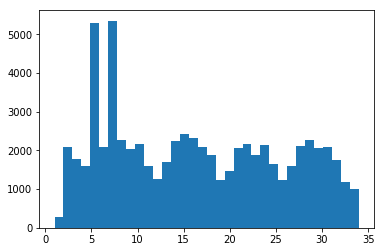

In [24]:
plt.hist(X,34)

## No possion distribution, 
On Sep 23, there comes a new mini series "The War", so the visits increase.

In [ ]:
np.var(X)

In [25]:
unique, counts = np.unique(X, return_counts=True)
ww2=dict(zip(unique, counts))

In [26]:
list_ww=list(ww2.values())

In [27]:
list_ww

[290,
 2087,
 1789,
 1587,
 5300,
 2079,
 5348,
 2263,
 2046,
 2171,
 1588,
 1258,
 1708,
 2229,
 2426,
 2315,
 2089,
 1891,
 1229,
 1461,
 2051,
 2171,
 1877,
 2147,
 1659,
 1231,
 1592,
 2114,
 2278,
 2062,
 2075,
 1754,
 1195,
 1000]

In [29]:
from scipy import stats
a,b=stats.kstest(list_ww, lambda x: (x-290) / (5000))

In [30]:
a

0.5139764705882353

In [ ]:
revisions_record = load_data('data/revisions/revision_records.pkl')

In [ ]:
revisions_record["World_War_II"][0]

In [ ]:
length=len(revisions_record["World_War_II"])/5
update_list=[]
for i in range(0,int(length)):
    a=revisions_record["World_War_II"][i].timestamp
    update_list.append(datetime.fromtimestamp(a))

In [ ]:
update_list

In [ ]:
update_X=[]
for i in range(0,int(length)):
    if(update_list[i].month==9):
        value=update_list[i].day-17
    else:
        value=update_list[i].day+13
    update_X.append(value) 

In [ ]:
len(update_X)

In [ ]:
unique, counts = np.unique(update_X, return_counts=True)
ww2_update=dict(zip(unique, counts))

In [ ]:
ww2_update

In [ ]:
xlabel=[]
for i in range(0,34):
    xlabel.append(i+1)

In [ ]:
plt.figure(figsize=(8,4)) 
l1, = plt.plot(xlabel, list_ww, label='actual value')
#l2, = plt.plot(xlabel, list_ww_update, color='red', linewidth=1.0, linestyle='--', label='prediction value')
plt.xlabel("day")
plt.ylabel("value")
plt.legend(loc='upper right')
plt.title("World War II")
plt.show() 

In [ ]:

plt.figure(figsize=(8,4)) 
#l1, = plt.plot(xlabel, list_ww, label='actual value')
l2, = plt.plot(ww2_update.keys(), ww2_update.values(), color='red', linewidth=1.0, linestyle='--', label='prediction value')
plt.xlabel("day")
plt.ylabel("value")
plt.legend(loc='upper right')
plt.title("World War II")
plt.show() 